In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [285]:
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
pd.options.display.float_format = "{:,.2f}".format

In [286]:
df = pd.read_excel("database_cleaned.xlsx")

In [287]:
df

,Vous êtes de quel département ?,Le temps de cycle actuel du processus d'achat est trop long et complexe,Le processus d'achat est souvent retardé en raison de la nécessité de demander des approbations supplémentaires,Les achats sont planifiés en fonction de leur importance et de leur urgence,Le processus d'achat implique des déplacements et des temps d'attente inutiles,Le processus d'achat est transparent et facile à comprendre,Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour planifier leurs demandes à l'avance,Le manque de communication efficace entre les départements est une source majeure de gaspillage,Les délais de livraison des fournisseurs sont respectés,Le manque de technologie et d'automatisation est une source majeure de gaspillage,Les méthodes et les logiciels d'analyse de données pour surveiller et améliorer les processus d'achat sont mise en place,Le processus d'achat est-il standardisé pour garantir une qualité constante,La qualité des produits achetés est constante et conforme aux spécifications attendues,Les outils et les technologies utilisés dans le processus d'achat contribuent à garantir la qualité des produits achetés,Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour cerner leurs besoins,Manque de compréhension des besoins du demandeur auprès des acheteurs,Les demandes d'achat sont traitées de manière à répondre aux besoins du demandeur de manière efficace,Les problèmes de la qualité des produits et services fournis par les fournisseurs actuels sont souvent rencontrés,Les fournisseurs sont évalués régulièrement en fonction de leur qualité,À quel niveau estimez-vous le nombre de défauts par million d'opportunités dans le processus d'achat actuel ?
0,Département Supply Chain & Purchasing,D’accord,D’accord,D’accord,Tout à fait d’accord,Pas d’accord,Pas du tout d'accord,Pas du tout d'accord,Pas d’accord,D’accord,D’accord,Pas d’accord,Pas d’accord,Pas d’accord,Pas du tout d'accord,D’accord,D’accord,Légèrement d’accord,Pas d’accord,3 Sigma (environ 66 800 défauts par million d'...
1,Département Supply Chain & Purchasing,D’accord,D’accord,Tout à fait d’accord,Tout à fait d’accord,Légèrement d’accord,Légèrement pas d’accord,Tout à fait d’accord,Pas d’accord,Tout à fait d’accord,Pas du tout d'accord,D’accord,D’accord,D’accord,Légèrement d’accord,Légèrement d’accord,Tout à fait d’accord,D’accord,D’accord,5 Sigma (environ 233 défauts par million d'opp...
2,Département Supply Chain & Purchasing,Tout à fait d’accord,D’accord,Pas d’accord,D’accord,Tout à fait d’accord,Légèrement d’accord,D’accord,Légèrement pas d’accord,D’accord,Tout à fait d’accord,Légèrement pas d’accord,D’accord,Légèrement d’accord,Pas d’accord,D’accord,Tout à fait d’accord,D’accord,Pas du tout d'accord,3 Sigma (environ 66 800 défauts par million d'...
3,Département Production,Tout à fait d’accord,D’accord,Légèrement pas d’accord,D’accord,Légèrement d’accord,Légèrement d’accord,D’accord,Légèrement pas d’accord,D’accord,D’accord,Légèrement pas d’accord,D’accord,Légèrement d’accord,Pas d’accord,D’accord,Tout à fait d’accord,D’accord,Légèrement d’accord,3 Sigma (environ 66 800 défauts par million d'...
4,Département Production,Tout à fait d’accord,D’accord,Légèrement pas d’accord,D’accord,Légèrement d’accord,Légèrement d’accord,D’accord,Légèrement pas d’accord,D’accord,D’accord,Légèrement pas d’accord,D’accord,Légèrement d’accord,Pas d’accord,D’accord,Tout à fait d’accord,D’accord,Légèrement d’accord,3 Sigma (environ 66 800 défauts par million d'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Département Supply Chain & Purchasing,Tout à fait d’accord,D’accord,Légèrement pas d’accord,D’accord,Pas d’accord,Légèrement d’accord,D’accord,Légèrement pas d’accord,D’accord,Pas d’accord,Légèrement pas d’accord,D’accord,Légèrement d’accord,Pas d’accord,D’accord,Tout à fait d’accord,D’accord,Légèrement d’accord,2 Sigma (environ 308 000 défauts par million d..

In [354]:
type(df)

pandas.core.frame.DataFrame

## Statistiques descriptives

In [288]:
df.shape

(81, 20)

In [289]:
items_index = []
for i in range(df.shape[1]):
    items_index.append(f'item_{i+1}')
items = pd.DataFrame(data=df.columns, index=items_index)

In [290]:
from IPython.display import HTML
HTML(items.to_html(escape=False))

,0
item_1,Vous êtes de quel département ?
item_2,Le temps de cycle actuel du processus d'achat est trop long et complexe
item_3,Le processus d'achat est souvent retardé en raison de la nécessité de demander des approbations supplémentaires
item_4,Les achats sont planifiés en fonction de leur importance et de leur urgence
item_5,Le processus d'achat implique des déplacements et des temps d'attente inutiles
item_6,Le processus d'achat est transparent et facile à comprendre
item_7,Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour planifier leurs demandes à l'avance
item_8,Le manque de communication efficace entre les départements est une source majeure de gaspillage
item_9,Les délais de livraison des fournisseurs sont respectés
item_10,Le manque de technologie et d'automatisation est une source majeure de gaspillage


In [291]:
custom_order = [
    ("Tout à fait d’accord",),
    ("D’accord",),
    ("Légèrement d’accord",),
    ("Légèrement pas d’accord",),
    ("Pas d’accord",),
    ("Pas du tout d'accord",),
]

## item_1

In [292]:
départements = df.iloc[:,0].to_frame().value_counts()

In [361]:
départements

Vous êtes de quel département ?      
Département Production                   28
Département Supply Chain & Purchasing    13
Département Technique                    12
Département Maintenance                   9
Département Finance                       7
Département Qualité                       7
Département RH & HSE                      3
Département IT                            2
dtype: int64

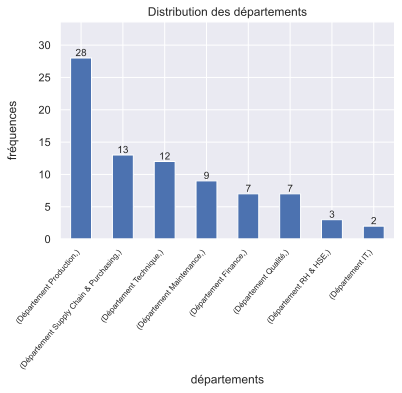

In [356]:
départements.plot.bar()
plt.xlabel("départements")
plt.xticks(rotation=50, ha="right", fontsize=8)
plt.ylabel("fréquences", labelpad=20)
plt.title("Distribution des départements")

for i, v in enumerate(départements):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, départements.max() * 1.2) 
plt.show()   

## item_2

In [295]:
item_2 = df.iloc[:,1].to_frame().value_counts()
item_2 = item_2.reindex(custom_order).fillna(0).astype(int)
item_2

Le temps de cycle actuel du processus d'achat est trop long et complexe
Tout à fait d’accord                                                       46
D’accord                                                                   21
Légèrement d’accord                                                        12
Légèrement pas d’accord                                                     0
Pas d’accord                                                                2
Pas du tout d'accord                                                        0
dtype: int32

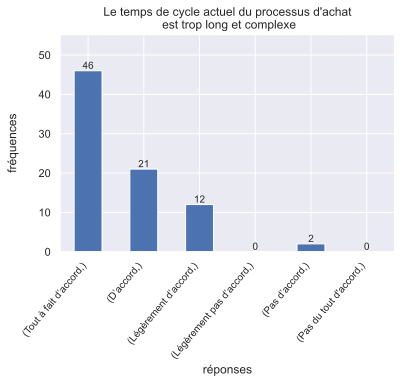

In [297]:
item_2.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le temps de cycle actuel du processus d'achat\n est trop long et complexe")

for i, v in enumerate(item_2):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_2.max() * 1.2) 
plt.show() 

In [298]:
item_3 = df.iloc[:,2].to_frame().value_counts()
item_3 = item_3.reindex(custom_order).fillna(0).astype(int)
item_3


Le processus d'achat est souvent retardé en raison de la nécessité de demander des approbations supplémentaires
Tout à fait d’accord                                                                                               28
D’accord                                                                                                           37
Légèrement d’accord                                                                                                15
Légèrement pas d’accord                                                                                             0
Pas d’accord                                                                                                        1
Pas du tout d'accord                                                                                                0
dtype: int32

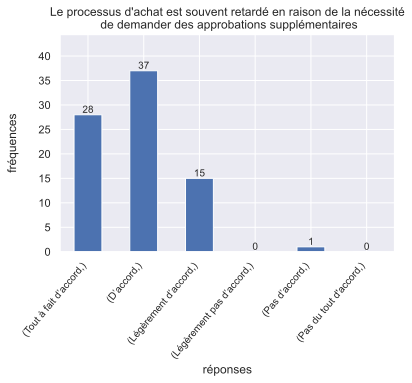

In [299]:
item_3.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le processus d'achat est souvent retardé en raison de la nécessité\n de demander des approbations supplémentaires")

for i, v in enumerate(item_3):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_3.max() * 1.2) 
plt.show() 

In [300]:
item_4 = df.iloc[:,3].to_frame().value_counts()
item_4 = item_4.reindex(custom_order).fillna(0).astype(int)
item_4


Les achats sont planifiés en fonction de leur importance et de leur urgence
Tout à fait d’accord                                                            4
D’accord                                                                        3
Légèrement d’accord                                                             6
Légèrement pas d’accord                                                        33
Pas d’accord                                                                   26
Pas du tout d'accord                                                            9
dtype: int32

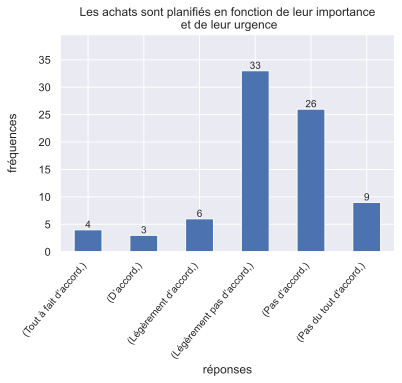

In [301]:
item_4.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les achats sont planifiés en fonction de leur importance\n et de leur urgence")

for i, v in enumerate(item_4):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_4.max() * 1.2) 
plt.show() 

In [302]:
item_5 = df.iloc[:,4].to_frame().value_counts()
item_5 = item_5.reindex(custom_order).fillna(0).astype(int)
item_5

Le processus d'achat implique des déplacements et des temps d'attente inutiles
Tout à fait d’accord                                                              26
D’accord                                                                          35
Légèrement d’accord                                                               17
Légèrement pas d’accord                                                            1
Pas d’accord                                                                       2
Pas du tout d'accord                                                               0
dtype: int32

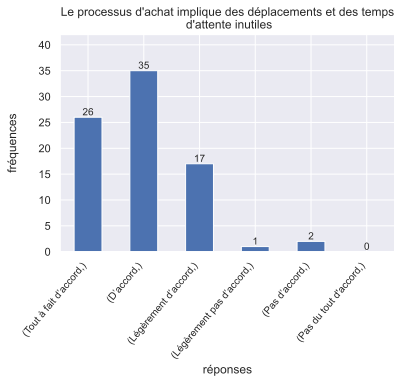

In [303]:
item_5.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le processus d'achat implique des déplacements et des temps\n d'attente inutiles")

for i, v in enumerate(item_5):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_5.max() * 1.2) 
plt.show() 

In [304]:
item_6 = df.iloc[:,5].to_frame().value_counts()
item_6 = item_6.reindex(custom_order).fillna(0).astype(int)
item_6

Le processus d'achat est transparent et facile à comprendre
Tout à fait d’accord                                            1
D’accord                                                       24
Légèrement d’accord                                            33
Légèrement pas d’accord                                        13
Pas d’accord                                                    8
Pas du tout d'accord                                            2
dtype: int32

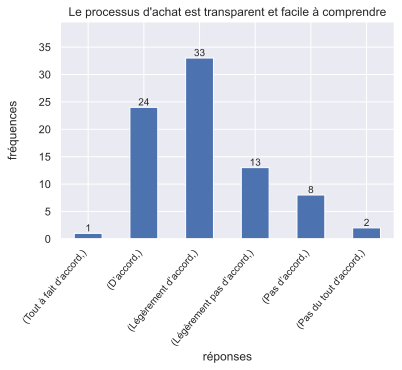

In [305]:
item_6.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le processus d'achat est transparent et facile à comprendre")

for i, v in enumerate(item_6):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_6.max() * 1.2) 
plt.show() 

In [306]:
item_7 = df.iloc[:,6].to_frame().value_counts()
item_7 = item_7.reindex(custom_order).fillna(0).astype(int)
item_7

Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour planifier leurs demandes à l'avance
Tout à fait d’accord                                                                                                      3
D’accord                                                                                                                 25
Légèrement d’accord                                                                                                      33
Légèrement pas d’accord                                                                                                  15
Pas d’accord                                                                                                              2
Pas du tout d'accord                                                                                                      3
dtype: int32

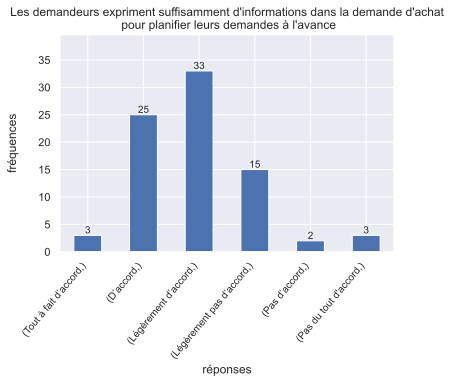

In [307]:
item_7.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les demandeurs expriment suffisamment d'informations dans la demande d'achat\n pour planifier leurs demandes à l'avance")

for i, v in enumerate(item_7):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_7.max() * 1.2) 
plt.show() 

<AxesSubplot:xlabel="Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour planifier leurs demandes à l'avance">

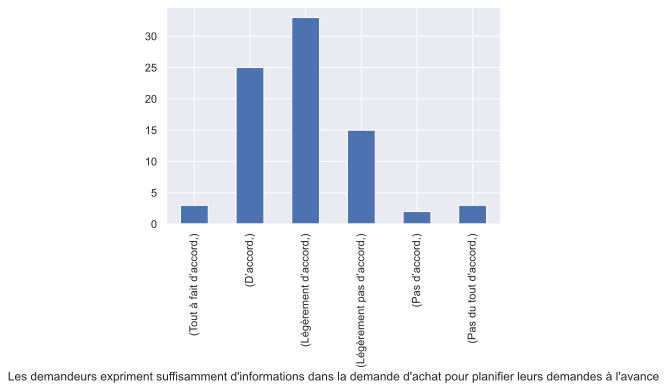

In [353]:
item_7.plot.bar()

In [308]:
item_8 = df.iloc[:,7].to_frame().value_counts()
item_8 = item_8.reindex(custom_order).fillna(0).astype(int)
item_8

Le manque de communication efficace entre les départements est une source majeure de gaspillage
Tout à fait d’accord                                                                               26
D’accord                                                                                           34
Légèrement d’accord                                                                                16
Légèrement pas d’accord                                                                             3
Pas d’accord                                                                                        0
Pas du tout d'accord                                                                                2
dtype: int32

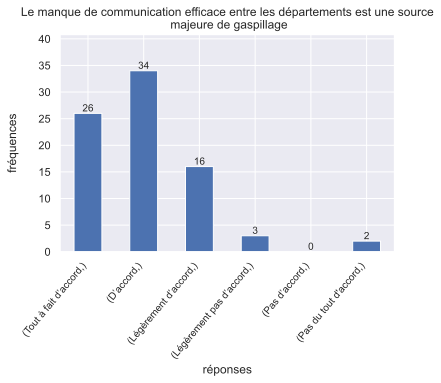

In [309]:
item_8.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le manque de communication efficace entre les départements est une source\n majeure de gaspillage")

for i, v in enumerate(item_8):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_8.max() * 1.2) 
plt.show() 

In [310]:
item_9 = df.iloc[:,8].to_frame().value_counts()
item_9 = item_9.reindex(custom_order).fillna(0).astype(int)
item_9

Les délais de livraison des fournisseurs sont respectés
Tout à fait d’accord                                        0
D’accord                                                    2
Légèrement d’accord                                        13
Légèrement pas d’accord                                    35
Pas d’accord                                               27
Pas du tout d'accord                                        4
dtype: int32

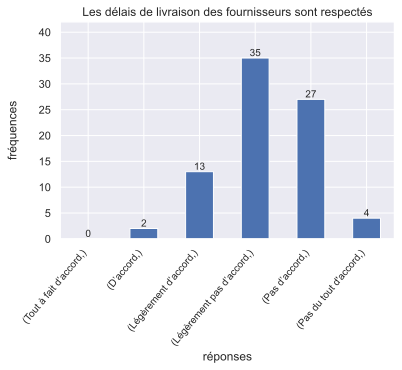

In [311]:
item_9.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les délais de livraison des fournisseurs sont respectés")

for i, v in enumerate(item_9):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_9.max() * 1.2) 
plt.show() 

In [312]:
item_10 = df.iloc[:,9].to_frame().value_counts()
item_10 = item_10.reindex(custom_order).fillna(0).astype(int)
item_10

Le manque de technologie et d'automatisation est une source majeure de gaspillage
Tout à fait d’accord                                                                 14
D’accord                                                                             35
Légèrement d’accord                                                                  29
Légèrement pas d’accord                                                               2
Pas d’accord                                                                          1
Pas du tout d'accord                                                                  0
dtype: int32

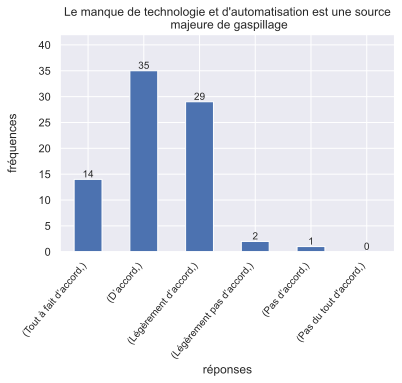

In [313]:
item_10.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le manque de technologie et d'automatisation est une source\n majeure de gaspillage")

for i, v in enumerate(item_10):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_10.max() * 1.2) 
plt.show() 

In [314]:
item_11 = df.iloc[:,10].to_frame().value_counts()
item_11 = item_11.reindex(custom_order).fillna(0).astype(int)
item_11

Les méthodes et les logiciels d'analyse de données pour surveiller et améliorer les processus d'achat sont mise en place
Tout à fait d’accord                                                                                                         4
D’accord                                                                                                                    20
Légèrement d’accord                                                                                                          8
Légèrement pas d’accord                                                                                                      3
Pas d’accord                                                                                                                38
Pas du tout d'accord                                                                                                         8
dtype: int32

(0.0, 45.6)

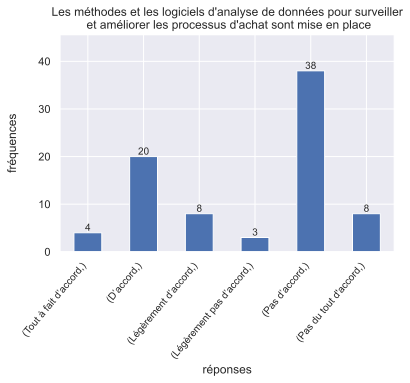

In [315]:
item_11.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les méthodes et les logiciels d'analyse de données pour surveiller\n et améliorer les processus d'achat sont mise en place")

for i, v in enumerate(item_11):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_11.max() * 1.2) 

In [316]:
item_12 = df.iloc[:,11].to_frame().value_counts()
item_12 = item_12.reindex(custom_order).fillna(0).astype(int)
item_12

Le processus d'achat est-il standardisé pour garantir une qualité constante
Tout à fait d’accord                                                            0
D’accord                                                                        4
Légèrement d’accord                                                            17
Légèrement pas d’accord                                                        30
Pas d’accord                                                                   30
Pas du tout d'accord                                                            0
dtype: int32

(0.0, 36.0)

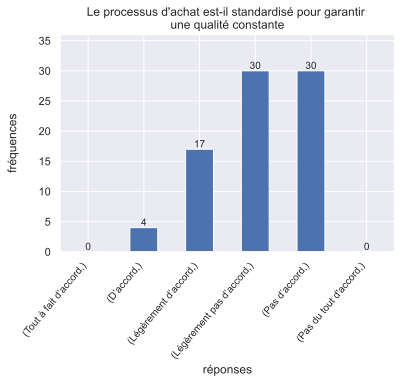

In [317]:
item_12.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Le processus d'achat est-il standardisé pour garantir \nune qualité constante")

for i, v in enumerate(item_12):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_12.max() * 1.2) 

In [318]:
item_13 = df.iloc[:,12].to_frame().value_counts()
item_13 = item_13.reindex(custom_order).fillna(0).astype(int)
item_13

La qualité des produits achetés est constante et conforme aux spécifications attendues
Tout à fait d’accord                                                                      11
D’accord                                                                                  33
Légèrement d’accord                                                                       32
Légèrement pas d’accord                                                                    3
Pas d’accord                                                                               1
Pas du tout d'accord                                                                       1
dtype: int32

(0.0, 39.6)

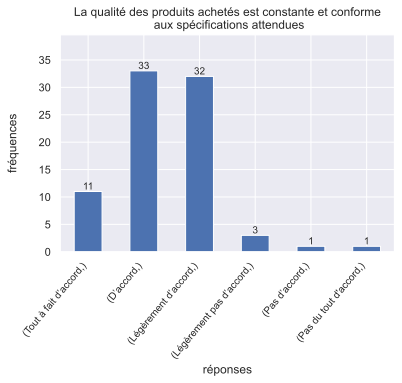

In [319]:
item_13.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("La qualité des produits achetés est constante et conforme\n aux spécifications attendues")

for i, v in enumerate(item_13):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_13.max() * 1.2) 

In [320]:
item_14 = df.iloc[:,13].to_frame().value_counts()
item_14 = item_14.reindex(custom_order).fillna(0).astype(int)
item_14

Les outils et les technologies utilisés dans le processus d'achat contribuent à garantir la qualité des produits achetés
Tout à fait d’accord                                                                                                         1
D’accord                                                                                                                    15
Légèrement d’accord                                                                                                         31
Légèrement pas d’accord                                                                                                     28
Pas d’accord                                                                                                                 5
Pas du tout d'accord                                                                                                         1
dtype: int32

(0.0, 37.199999999999996)

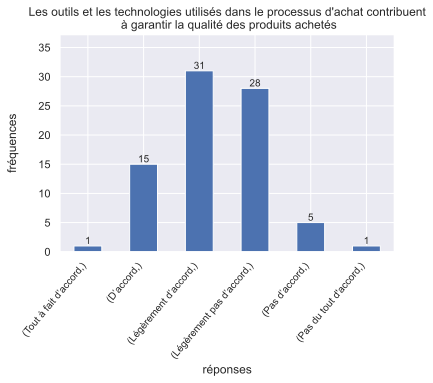

In [321]:
item_14.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les outils et les technologies utilisés dans le processus d'achat contribuent\n à garantir la qualité des produits achetés")

for i, v in enumerate(item_14):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_14.max() * 1.2) 

In [322]:
item_15 = df.iloc[:,14].to_frame().value_counts()
item_15 = item_15.reindex(custom_order).fillna(0).astype(int)
item_15

Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour cerner leurs besoins
Tout à fait d’accord                                                                                       3
D’accord                                                                                                   5
Légèrement d’accord                                                                                        4
Légèrement pas d’accord                                                                                   30
Pas d’accord                                                                                              24
Pas du tout d'accord                                                                                      15
dtype: int32

(0.0, 36.0)

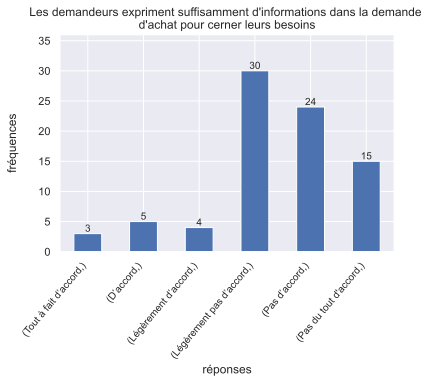

In [323]:
item_15.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les demandeurs expriment suffisamment d'informations dans la demande \nd'achat pour cerner leurs besoins")

for i, v in enumerate(item_15):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_15.max() * 1.2) 

In [324]:
item_16 = df.iloc[:,15].to_frame().value_counts()
item_16 = item_16.reindex(custom_order).fillna(0).astype(int)
item_16

Manque de compréhension des besoins du demandeur auprès des acheteurs
Tout à fait d’accord                                                     20
D’accord                                                                 33
Légèrement d’accord                                                      22
Légèrement pas d’accord                                                   4
Pas d’accord                                                              1
Pas du tout d'accord                                                      1
dtype: int32

(0.0, 39.6)

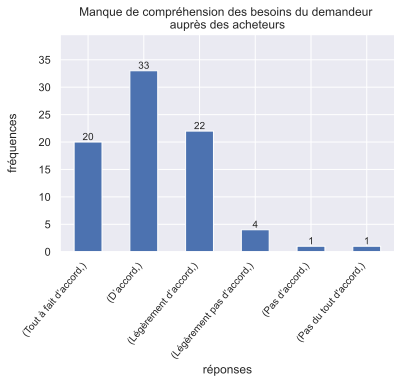

In [325]:
item_16.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Manque de compréhension des besoins du demandeur \nauprès des acheteurs")

for i, v in enumerate(item_16):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_16.max() * 1.2) 

In [326]:
item_17 = df.iloc[:,16].to_frame().value_counts()
item_17 = item_17.reindex(custom_order).fillna(0).astype(int)
item_17

Les demandes d'achat sont traitées de manière à répondre aux besoins du demandeur de manière efficace
Tout à fait d’accord                                                                                     33
D’accord                                                                                                 31
Légèrement d’accord                                                                                      15
Légèrement pas d’accord                                                                                   2
Pas d’accord                                                                                              0
Pas du tout d'accord                                                                                      0
dtype: int32

(0.0, 39.6)

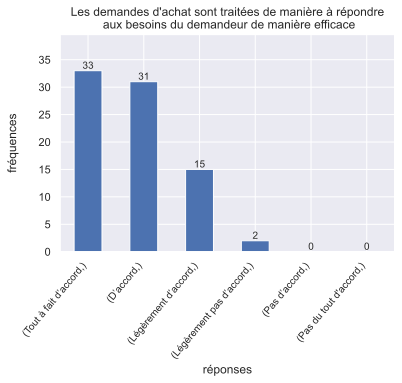

In [327]:
item_17.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les demandes d'achat sont traitées de manière à répondre\n aux besoins du demandeur de manière efficace")

for i, v in enumerate(item_17):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_17.max() * 1.2) 

In [328]:
item_18 = df.iloc[:,17].to_frame().value_counts()
item_18 = item_18.reindex(custom_order).fillna(0).astype(int)
item_18

Les problèmes de la qualité des produits et services fournis par les fournisseurs actuels sont souvent rencontrés
Tout à fait d’accord                                                                                                 12
D’accord                                                                                                             31
Légèrement d’accord                                                                                                  32
Légèrement pas d’accord                                                                                               4
Pas d’accord                                                                                                          2
Pas du tout d'accord                                                                                                  0
dtype: int32

(0.0, 38.4)

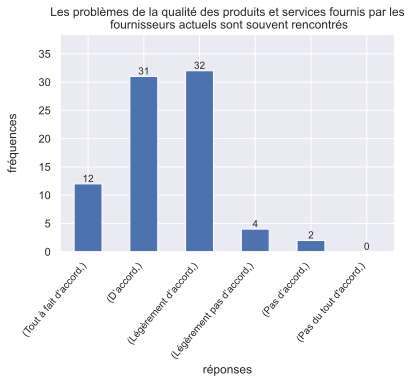

In [329]:
item_18.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les problèmes de la qualité des produits et services fournis par les\n fournisseurs actuels sont souvent rencontrés")

for i, v in enumerate(item_18):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_18.max() * 1.2) 

In [330]:
item_19 = df.iloc[:,18].to_frame().value_counts()
item_19 = item_19.reindex(custom_order).fillna(0).astype(int)
item_19

Les fournisseurs sont évalués régulièrement en fonction de leur qualité
Tout à fait d’accord                                                        5
D’accord                                                                   13
Légèrement d’accord                                                        28
Légèrement pas d’accord                                                    26
Pas d’accord                                                                4
Pas du tout d'accord                                                        5
dtype: int32

(0.0, 33.6)

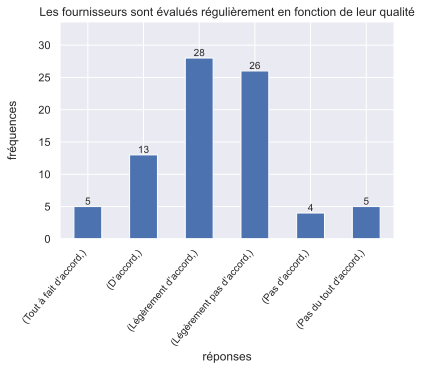

In [331]:
item_19.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=10)
plt.ylabel("fréquences", labelpad=20)
plt.title("Les fournisseurs sont évalués régulièrement en fonction de leur qualité")

for i, v in enumerate(item_19):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_19.max() * 1.2) 

In [332]:
item_20 = df.iloc[:,19].to_frame().value_counts()
item_20

À quel niveau estimez-vous le nombre de défauts par million d'opportunités dans le processus d'achat actuel ?
3 Sigma (environ 66 800 défauts par million d'opportunités)                                                      39
2 Sigma (environ 308 000 défauts par million d'opportunités)                                                     29
4 Sigma (environ 6200 défauts par million d'opportunités)                                                         5
5 Sigma (environ 233 défauts par million d'opportunités)                                                          4
1 Sigma (plus de 690 000 défauts par million d'opportunités)                                                      2
6 Sigma (environ 3,4 défauts par million d'opportunités)                                                          2
dtype: int64

(0.0, 46.8)

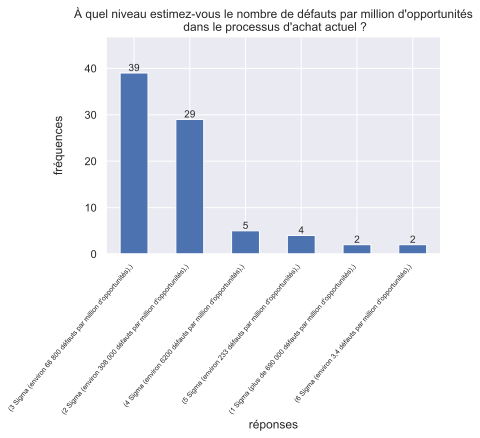

In [333]:
item_20.plot.bar()
plt.xlabel("réponses")
plt.xticks(rotation=50, ha="right", fontsize=7)
plt.ylabel("fréquences", labelpad=20)
plt.title("À quel niveau estimez-vous le nombre de défauts par million d'opportunités\n dans le processus d'achat actuel ?")

for i, v in enumerate(item_20):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10)

plt.ylim(0, item_20.max() * 1.2) 

## Test de fiabilité et de validité

In [334]:
mapping_dict = {
    "Tout à fait d’accord":6,
    "D’accord":5,
    "Légèrement d’accord":4,
    "Légèrement pas d’accord":3,
    "Pas d’accord":2,
    "Pas du tout d'accord":1,
}

In [335]:
df_2 = df.iloc[:,1:-1].replace(mapping_dict)

In [336]:
df_2

,Le temps de cycle actuel du processus d'achat est trop long et complexe,Le processus d'achat est souvent retardé en raison de la nécessité de demander des approbations supplémentaires,Les achats sont planifiés en fonction de leur importance et de leur urgence,Le processus d'achat implique des déplacements et des temps d'attente inutiles,Le processus d'achat est transparent et facile à comprendre,Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour planifier leurs demandes à l'avance,Le manque de communication efficace entre les départements est une source majeure de gaspillage,Les délais de livraison des fournisseurs sont respectés,Le manque de technologie et d'automatisation est une source majeure de gaspillage,Les méthodes et les logiciels d'analyse de données pour surveiller et améliorer les processus d'achat sont mise en place,Le processus d'achat est-il standardisé pour garantir une qualité constante,La qualité des produits achetés est constante et conforme aux spécifications attendues,Les outils et les technologies utilisés dans le processus d'achat contribuent à garantir la qualité des produits achetés,Les demandeurs expriment suffisamment d'informations dans la demande d'achat pour cerner leurs besoins,Manque de compréhension des besoins du demandeur auprès des acheteurs,Les demandes d'achat sont traitées de manière à répondre aux besoins du demandeur de manière efficace,Les problèmes de la qualité des produits et services fournis par les fournisseurs actuels sont souvent rencontrés,Les fournisseurs sont évalués régulièrement en fonction de leur qualité
0,5,5,5,6,2,1,1,2,5,5,2,2,2,1,5,5,4,2
1,5,5,6,6,4,3,6,2,6,1,5,5,5,4,4,6,5,5
2,6,5,2,5,6,4,5,3,5,6,3,5,4,2,5,6,5,1
3,6,5,3,5,4,4,5,3,5,5,3,5,4,2,5,6,5,4
4,6,5,3,5,4,4,5,3,5,5,3,5,4,2,5,6,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6,5,3,5,2,4,5,3,5,2,3,5,4,2,5,6,5,4
77,6,5,3,5,2,4,5,3,5,2,3,5,4,2,5,6,5,4
78,4,6,4,2,3,6,5,1,3,6,5,4,2,6,5,4,6,6
79,2,2,3,5,2,4,5,3,5,2,3,5,4,3,5,6,5,4


In [342]:
import pingouin as pg
import statsmodels.api as sm


(0.6629323477371004, array([0.546, 0.761]))

#### Alpha de Cronbach

In [349]:
alpha = pg.cronbach_alpha(data=df_2)
alpha


(0.6629323477371004, array([0.546, 0.761]))

#### Fiabilité composite

In [346]:
cov_matrix = np.cov(df_2.values, rowvar=False)
eigenvalues = np.linalg.eigvals(cov_matrix)
composite_reliability = np.sum(eigenvalues) / (np.sum(eigenvalues) + np.trace(cov_matrix))
composite_reliability

0.5000000000000002

#### Variance moyenne extraite

In [351]:
# factor = sm.add_factor('Factor', ['Item1', 'Item2', 'Item3'])

# model = sm.Model(df_2)
# model.add_model(factor)

# result = model.fit()

# factor_loadings = result.model_factors['Factor']['factor_loadings']
# residual_variances = result.model_factors['Factor']['residual_variances']

# ave = sum(factor_loadings**2) / (sum(factor_loadings**2) + sum(residual_variances))

# print("Average Variance Extracted (AVE):", ave)